# LAB-5
M. HARIVIRINCHI
BL.EN.U4AIE21077

### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal. 

after fft:


C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


amplitude spectrum


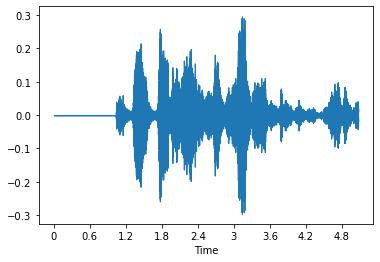

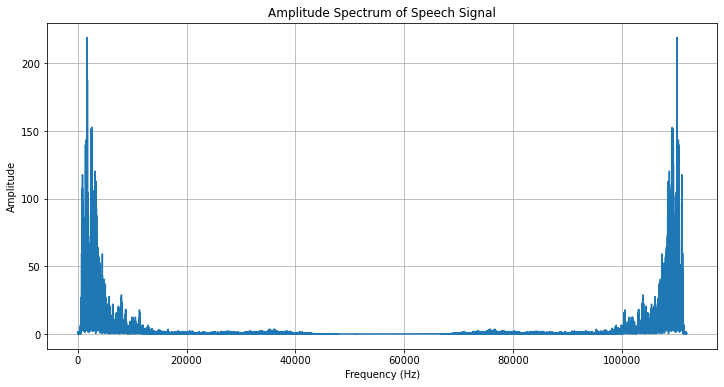

after reconstruction


C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


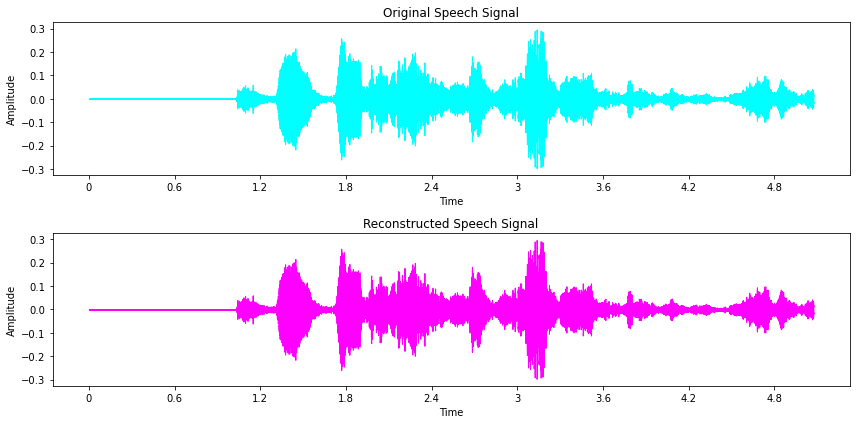

In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram
y, sr = librosa.load('Hari1.wav')
librosa.display.waveshow(y)
a = glob('Hari1.wav')
ipd.Audio(a[0])
# Use numpy.fft.fft() to transform the speech signal to its spectral domain
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))
# Calculate the amplitude spectrum (absolute values of the complex numbers)
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Use numpy.fft.ifft() to transform the speech signal from frequency domain to its time domain
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.display(ipd.Audio(ifft_result, rate=sr))
# Plot the original and reconstructed signals for comparison
plt.figure(figsize=(12, 6))
# Plot the original signal
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='cyan')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# Plot the reconstructed signal
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='magenta')  # Use np.real() to extract the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

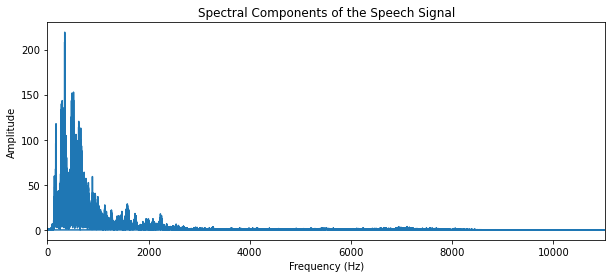

C:\Users\virin\AppData\Local\Temp\ipykernel_20432\371773057.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  ifft_result = ifft_result.astype(float)


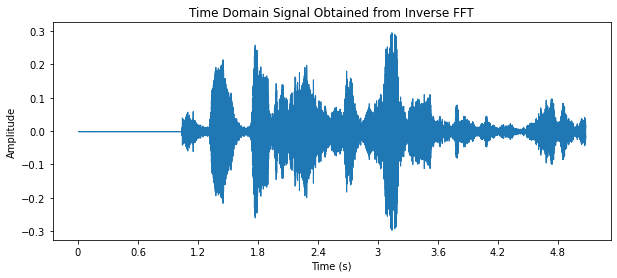

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the speech signal
y, sr = librosa.load('Hari1.wav')

# Compute the FFT (Fast Fourier Transform) to obtain the frequency spectrum
fft_result = np.fft.fft(y)

# Get the frequency components and their corresponding amplitudes
frequencies = np.fft.fftfreq(len(y), 1/sr)
amplitudes = np.abs(fft_result)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitudes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Components of the Speech Signal')
plt.xlim(0, sr/2)  # Show only positive frequencies
plt.show()

# Perform inverse FFT to transform the frequency spectrum back to the time domain
ifft_result = np.fft.ifft(fft_result)

# Convert the result to floating-point array
ifft_result = ifft_result.astype(float)

# Plot the time domain signal obtained from inverse FFT
plt.figure(figsize=(10, 4))
librosa.display.waveshow(ifft_result, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal Obtained from Inverse FFT')
plt.show()


# A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

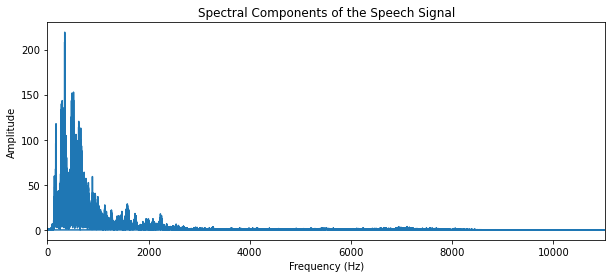

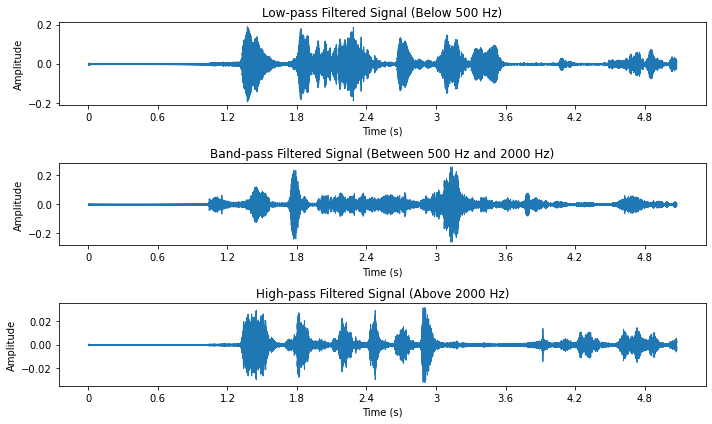

In [7]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the speech signal
y, sr = librosa.load('Hari1.wav')

# Compute the FFT (Fast Fourier Transform) to obtain the frequency spectrum
fft_result = np.fft.fft(y)

# Get the frequency components and their corresponding amplitudes
frequencies = np.fft.fftfreq(len(y), 1/sr)
amplitudes = np.abs(fft_result)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitudes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Components of the Speech Signal')
plt.xlim(0, sr/2)  # Show only positive frequencies
plt.show()

# Define frequency ranges for filtering
low_freq_range = (0, 500)  # Low-pass filter (select frequencies below 500 Hz)
bandpass_range = (500, 2000)  # Band-pass filter (select frequencies between 500 Hz and 2000 Hz)
highpass_range = (2000, sr/2)  # High-pass filter (select frequencies above 2000 Hz)

# Create filter masks for the specified frequency ranges
lowpass_mask = (np.abs(frequencies) < low_freq_range[1]).astype(int)
bandpass_mask = ((np.abs(frequencies) > bandpass_range[0]) & (np.abs(frequencies) < bandpass_range[1])).astype(int)
highpass_mask = (np.abs(frequencies) > highpass_range[0]).astype(int)

# Apply the masks to the spectrum
filtered_fft_lowpass = fft_result * lowpass_mask
filtered_fft_bandpass = fft_result * bandpass_mask
filtered_fft_highpass = fft_result * highpass_mask

# Perform inverse FFT to transform the filtered frequency spectrum back to the time domain
filtered_signal_lowpass = np.fft.ifft(filtered_fft_lowpass).real
filtered_signal_bandpass = np.fft.ifft(filtered_fft_bandpass).real
filtered_signal_highpass = np.fft.ifft(filtered_fft_highpass).real

# Plot the time domain signals obtained from inverse FFT
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.waveshow(filtered_signal_lowpass, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-pass Filtered Signal (Below 500 Hz)')

plt.subplot(3, 1, 2)
librosa.display.waveshow(filtered_signal_bandpass, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Band-pass Filtered Signal (Between 500 Hz and 2000 Hz)')

plt.subplot(3, 1, 3)
librosa.display.waveshow(filtered_signal_highpass, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-pass Filtered Signal (Above 2000 Hz)')

plt.tight_layout()
plt.show()


### Repeat A2 with other filter types such as Cosine / Gausian filters.

### Cosine filters

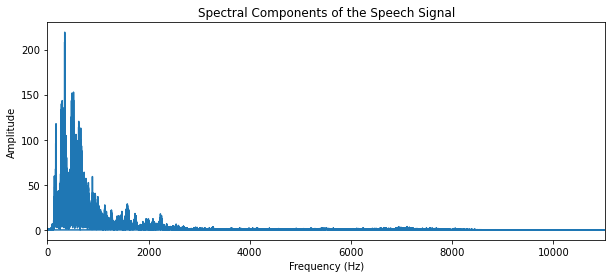

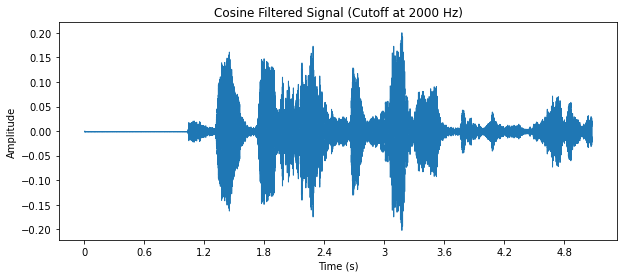

In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the speech signal
y, sr = librosa.load('Hari1.wav')

# Compute the FFT (Fast Fourier Transform) to obtain the frequency spectrum
fft_result = np.fft.fft(y)

# Get the frequency components and their corresponding amplitudes
frequencies = np.fft.fftfreq(len(y), 1/sr)
amplitudes = np.abs(fft_result)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitudes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Components of the Speech Signal')
plt.xlim(0, sr/2)  # Show only positive frequencies
plt.show()

# Define parameters for the cosine filter
cutoff_freq = 2000  # Cutoff frequency for the filter

# Create the cosine filter kernel
cosine_filter = np.cos(np.pi * frequencies / cutoff_freq) * (np.abs(frequencies) < cutoff_freq)

# Apply the filter to the spectrum
filtered_fft_cosine = fft_result * cosine_filter

# Perform inverse FFT to transform the filtered frequency spectrum back to the time domain
filtered_signal_cosine = np.fft.ifft(filtered_fft_cosine).real

# Plot the time domain signal obtained from inverse FFT
plt.figure(figsize=(10, 4))
librosa.display.waveshow(filtered_signal_cosine, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cosine Filtered Signal (Cutoff at 2000 Hz)')
plt.show()


###  Gausian filters

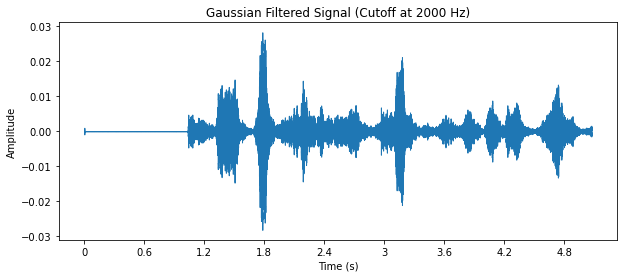

In [9]:
# Define parameters for the Gaussian filter
sigma = 500  # Standard deviation for the Gaussian filter

# Create the Gaussian filter kernel
gaussian_filter = np.exp(-0.5 * ((frequencies - cutoff_freq) / sigma)**2)

# Apply the filter to the spectrum
filtered_fft_gaussian = fft_result * gaussian_filter

# Perform inverse FFT to transform the filtered frequency spectrum back to the time domain
filtered_signal_gaussian = np.fft.ifft(filtered_fft_gaussian).real

# Plot the time domain signal obtained from inverse FFT
plt.figure(figsize=(10, 4))
librosa.display.waveshow(filtered_signal_gaussian, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Gaussian Filtered Signal (Cutoff at 2000 Hz)')
plt.show()